In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
data = pd.DataFrame(pd.read_csv('/Users/vidhisanghvi/Desktop/Country-data_updated.csv'))
data.head(5)

,country,unemp_rate,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.5,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,14.0,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,12.4,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,7.3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,NaN,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [4]:
data = data.drop('exports',1)
data = data.drop('imports',1)
data = data.drop('total_fer',1)
data = data.drop('child_mort',1)

In [5]:
data.head(5)

,country,unemp_rate,health,income,inflation,life_expec,gdpp
0,Afghanistan,1.5,7.58,1610.0,9.44,56.2,553.0
1,Albania,14.0,6.55,9930.0,4.49,76.3,4090.0
2,Algeria,12.4,4.17,12900.0,16.10,76.5,4460.0
3,Angola,7.3,2.85,5900.0,22.40,60.1,3530.0
4,Antigua and Barbuda,NaN,6.03,19100.0,1.44,76.8,12200.0


In [6]:
#checking duplicates
sum(data.duplicated(subset = 'country')) == 0
# No duplicate values

True

In [7]:
data.shape

(170, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
country       169 non-null object
unemp_rate    163 non-null float64
health        167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
gdpp          167 non-null float64
dtypes: float64(6), object(1)
memory usage: 9.4+ KB


In [9]:
data.describe()

,unemp_rate,health,income,inflation,life_expec,gdpp
count,163.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,6.729448,6.815689,17144.688623,7.781832,70.555689,12964.155689
std,5.122860,2.746837,19278.067698,10.570704,8.893172,18328.704809
min,0.100000,1.810000,609.000000,-4.210000,32.100000,231.000000
25%,3.400000,4.920000,3355.000000,1.810000,65.300000,1330.000000
50%,5.100000,6.320000,9960.000000,5.390000,73.100000,4660.000000
75%,8.950000,8.600000,22800.000000,10.750000,76.800000,14050.000000
max,29.100000,17.900000,125000.000000,104.000000,82.800000,105000.000000


In [10]:
#data cleaning
data.isnull().sum()

country       1
unemp_rate    7
health        3
income        3
inflation     3
life_expec    3
gdpp          3
dtype: int64

In [21]:
#had to drop the rows with the null 
data=data.dropna()

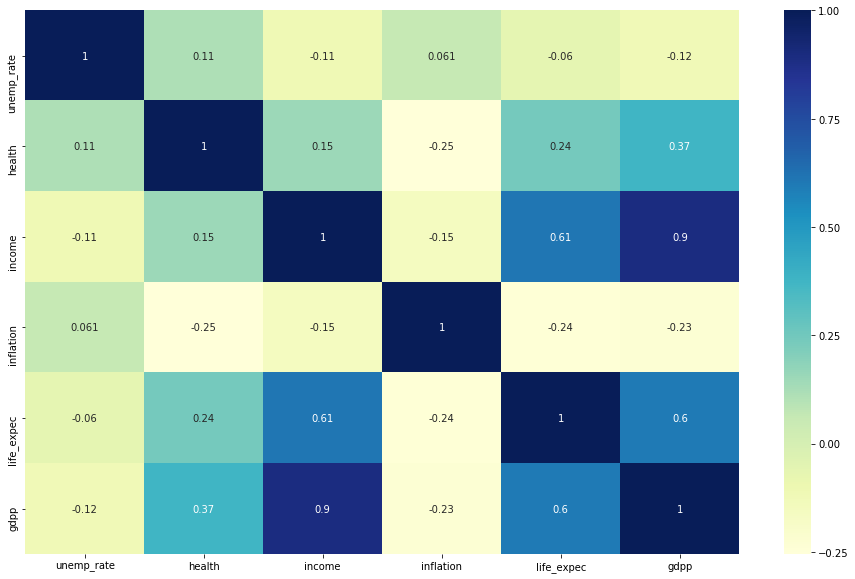

In [22]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

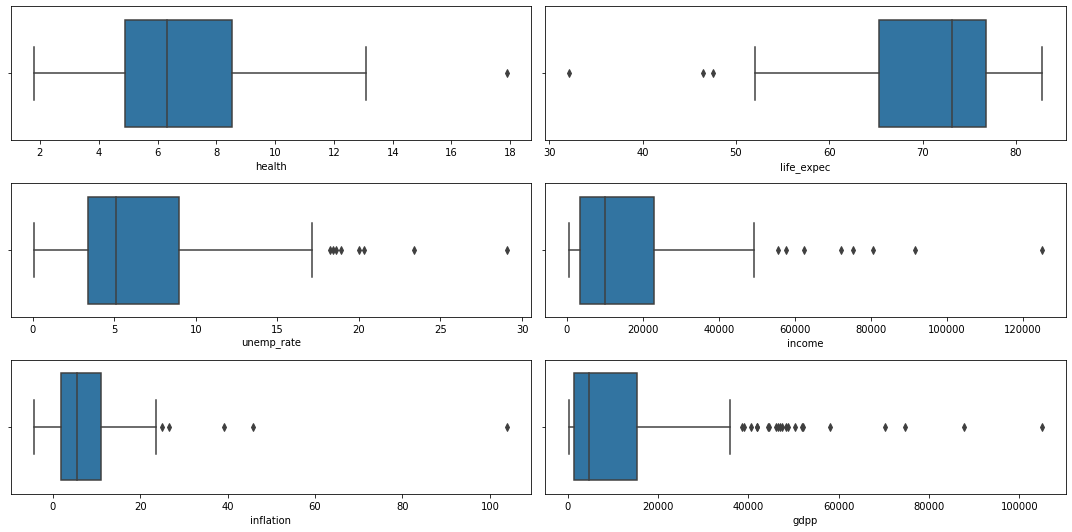

In [23]:
# We can see there is high correlation between some variables, we will use PCA to solve this issue.
#before that we do an outlier analysis
# We will see how values in each columns are distributed using boxplot
fig, axs = plt.subplots(3,2, figsize = (15,7.5))
plt1 = sns.boxplot(data['health'], ax = axs[0,0])
plt2 = sns.boxplot(data['life_expec'], ax = axs[0,1])
plt3 = sns.boxplot(data['unemp_rate'], ax = axs[1,0])
plt4 = sns.boxplot(data['income'], ax = axs[1,1])
plt5 = sns.boxplot(data['inflation'], ax = axs[2,0])
plt6 = sns.boxplot(data['gdpp'], ax = axs[2,1])

plt.tight_layout()

In [24]:
data.describe()

,unemp_rate,health,income,inflation,life_expec,gdpp
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,6.729448,6.753558,17348.423313,7.928380,70.604908,13135.546012
std,5.122860,2.693949,19439.487628,10.656448,8.946010,18508.566406
min,0.100000,1.810000,609.000000,-4.210000,32.100000,231.000000
25%,3.400000,4.885000,3545.000000,1.895000,65.300000,1310.000000
50%,5.100000,6.320000,9960.000000,5.450000,73.200000,4660.000000
75%,8.950000,8.525000,23000.000000,11.000000,76.850000,15300.000000
max,29.100000,17.900000,125000.000000,104.000000,82.800000,105000.000000


In [25]:
# Before manipulating data, we will save one copy of orignal data.
data_help = data.copy()
data_help.head()

,country,unemp_rate,health,income,inflation,life_expec,gdpp
0,Afghanistan,1.5,7.58,1610.0,9.44,56.2,553.0
1,Albania,14.0,6.55,9930.0,4.49,76.3,4090.0
2,Algeria,12.4,4.17,12900.0,16.10,76.5,4460.0
3,Angola,7.3,2.85,5900.0,22.40,60.1,3530.0
5,Argentina,8.5,8.10,18700.0,20.90,75.8,10300.0


In [27]:
# As we can see there are a number of outliers in the data and hence we need cap the outliers for further analysis
percentiles = data_help['unemp_rate'].quantile([0.05,0.95]).values
data_help['unemp_rate'][data_help['unemp_rate'] <= percentiles[0]] = percentiles[0]
data_help['unemp_rate'][data_help['unemp_rate'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['health'].quantile([0.05,0.95]).values
data_help['health'][data_help['health'] <= percentiles[0]] = percentiles[0]
data_help['health'][data_help['health'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['life_expec'].quantile([0.05,0.95]).values
data_help['life_expec'][data_help['life_expec'] <= percentiles[0]] = percentiles[0]
data_help['life_expec'][data_help['life_expec'] >= percentiles[1]] = percentiles[1]


percentiles = data_help['income'].quantile([0.05,0.95]).values
data_help['income'][data_help['income'] <= percentiles[0]] = percentiles[0]
data_help['income'][data_help['income'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['inflation'].quantile([0.05,0.95]).values
data_help['inflation'][data_help['inflation'] <= percentiles[0]] = percentiles[0]
data_help['inflation'][data_help['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['gdpp'].quantile([0.05,0.95]).values
data_help['gdpp'][data_help['gdpp'] <= percentiles[0]] = percentiles[0]
data_help['gdpp'][data_help['gdpp'] >= percentiles[1]] = percentiles[1]


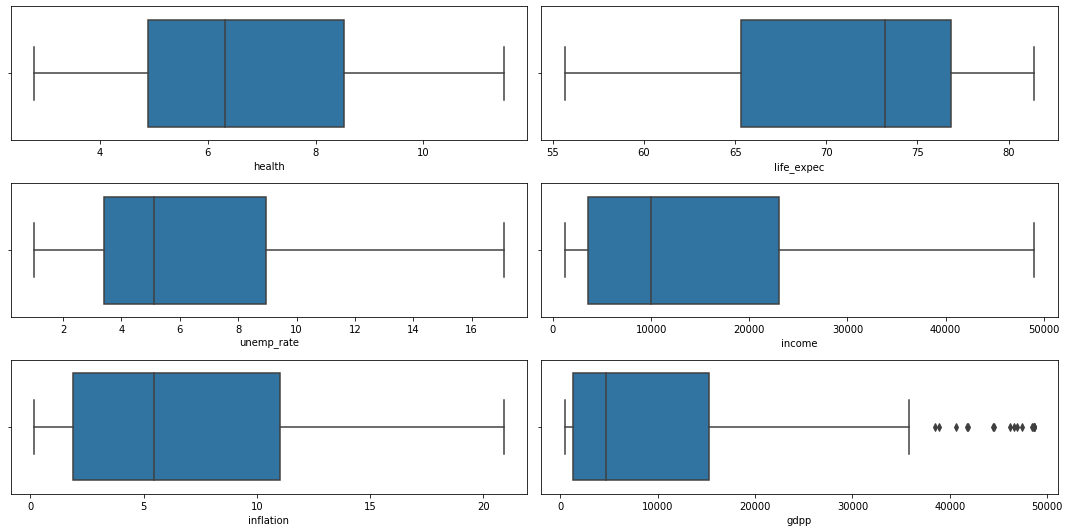

In [28]:
# We will see how values in each columns are now updated and distributed using boxplot without too many outliers
fig, axs = plt.subplots(3,2, figsize = (15,7.5))
plt1 = sns.boxplot(data_help['health'], ax = axs[0,0])
plt2 = sns.boxplot(data_help['life_expec'], ax = axs[0,1])
plt3 = sns.boxplot(data_help['unemp_rate'], ax = axs[1,0])
plt4 = sns.boxplot(data_help['income'], ax = axs[1,1])
plt5 = sns.boxplot(data_help['inflation'], ax = axs[2,0])
plt6 = sns.boxplot(data_help['gdpp'], ax = axs[2,1])

plt.tight_layout()

In [30]:
#now we scale the data
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['unemp_rate', 'health', 'income', 'inflation', 'life_expec', 'gdpp']
# Scale these variables using 'fit_transform'
data_help[varlist] = scaler.fit_transform(data_help[varlist])

In [31]:
#PCA on the data
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [32]:
# Putting feature variable to X
X = data_help.drop(['country'],axis=1)

# Putting response variable to y
y = data_help['country']

In [33]:
#Doing the PCA on the train data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [34]:
#Let's plot the principal components and try to make sense of them.
#We'll plot original features on the first 2 principal components as axes
pca.components_

array([[-0.03816559,  0.31403156,  0.5260407 , -0.30720458,  0.4831002 ,
         0.54355156],
       [ 0.82362276,  0.4959991 , -0.18551312, -0.15255684, -0.00166145,
        -0.13393648],
       [ 0.45321231, -0.3846144 ,  0.30548236,  0.69267463,  0.22743906,
         0.1477302 ],
       [-0.26041181,  0.67566085,  0.05843929,  0.59154582, -0.31597118,
         0.14996237],
       [ 0.21530098, -0.20367962,  0.31183261, -0.22069564, -0.77920431,
         0.39881649],
       [-0.02487397,  0.09714867,  0.70348551, -0.06261463, -0.08880178,
        -0.6951584 ]])

In [35]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.038166,0.823623,unemp_rate
1,0.314032,0.495999,health
2,0.526041,-0.185513,income
3,-0.307205,-0.152557,inflation
4,0.483100,-0.001661,life_expec


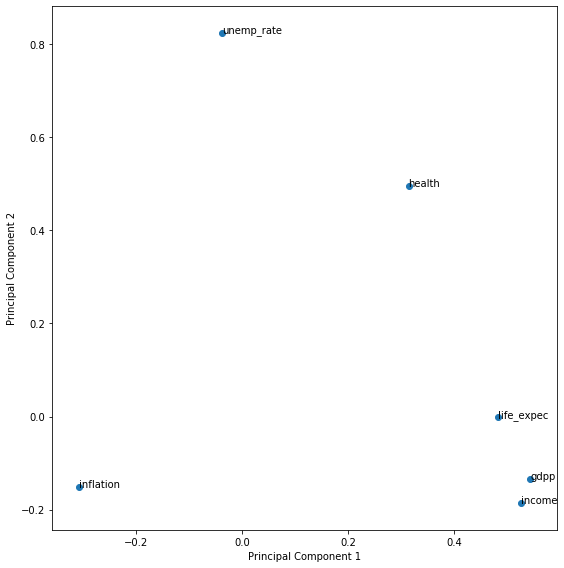

In [36]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [37]:
#Looking at the screeplot to assess the number of needed principal components
pca.explained_variance_ratio_

array([0.49275356, 0.18194921, 0.16058412, 0.10347434, 0.05430597,
       0.0069328 ])

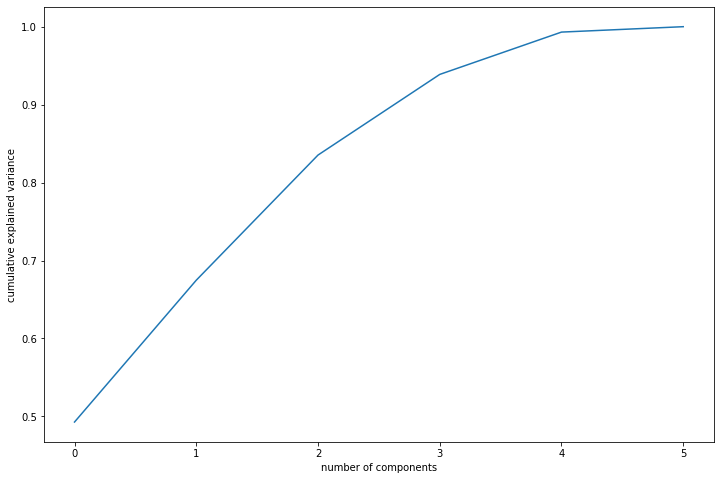

In [38]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [39]:
#Looks like 3 components are enough to describe 95% of the variance in the dataset
#We'll choose 3 components for our modeling
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [40]:
#Basis transformation - getting the data onto our PCs
df_pca = pca_final.fit_transform(X)
df_pca.shape

(163, 3)

In [41]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2
0,-1.749755,-0.635360,-1.214835
1,-0.134513,1.629584,0.436361
2,-0.856518,0.492056,1.987179
3,-2.471238,-0.824239,1.590066
4,-0.172074,0.139663,1.657231


In [42]:
#Creating correlation matrix for the principal components - we expect little to no correlation
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

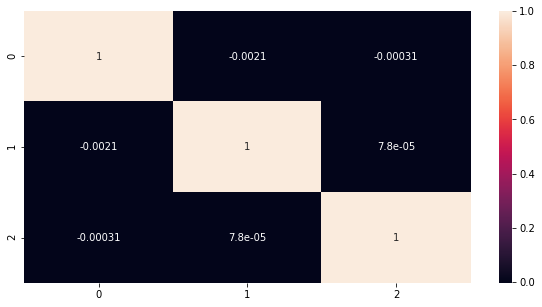

In [43]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [45]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [46]:
#The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
#If the value is between {0.01, ...,0.3}, the data is regularly spaced.
#If the value is around 0.5, it is random.
#If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
hopkins(df_pca)

0.7553218453255582

In [49]:
#hence the data has a high tendency to cluster
# Now focusing on hierarchial clustering

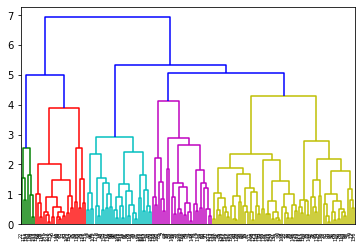

In [50]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [51]:
# Looking at the dedrogram it is observed that cutting it at n = 3 is most optimum.
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,ClusterID
0,-1.749755,-0.635360,-1.214835,0
1,-0.134513,1.629584,0.436361,0
2,-0.856518,0.492056,1.987179,0
3,-2.471238,-0.824239,1.590066,1
4,-0.172074,0.139663,1.657231,0


In [52]:
pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-1.749755,-0.635360,-1.214835,0.0
1,Albania,-0.134513,1.629584,0.436361,0.0
2,Algeria,-0.856518,0.492056,1.987179,0.0
3,Angola,-2.471238,-0.824239,1.590066,1.0
4,NaN,-0.172074,0.139663,1.657231,0.0


In [53]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,unemp_rate,health,income,inflation,life_expec,gdpp
0,Afghanistan,0.0,1.5,7.58,1610.0,9.44,56.2,553.0
1,Albania,0.0,14.0,6.55,9930.0,4.49,76.3,4090.0
2,Algeria,0.0,12.4,4.17,12900.0,16.10,76.5,4460.0
3,Angola,1.0,7.3,2.85,5900.0,22.40,60.1,3530.0
4,Argentina,0.0,8.5,8.10,18700.0,20.90,75.8,10300.0


In [54]:
hc_clusters_unemp_rate = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).unemp_rate.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [58]:
df = pd.concat([pd.Series(list(range(0,4))), hc_clusters_unemp_rate, hc_clusters_health,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "unemp_rate", "health_mean",  "income_mean", "inflation_mean",
               "life_expec_mean", "gdpp_mean"]
df=df.dropna()

In [59]:
df

,ClusterID,unemp_rate,health_mean,income_mean,inflation_mean,life_expec_mean,gdpp_mean
0,0,7.183505,6.654742,16494.556701,8.034361,70.116495,11215.463918
1,1,5.236667,7.252000,22371.433333,7.776833,72.606667,19902.766667
2,2,6.571875,6.716875,16497.750000,5.752750,70.659375,13704.093750


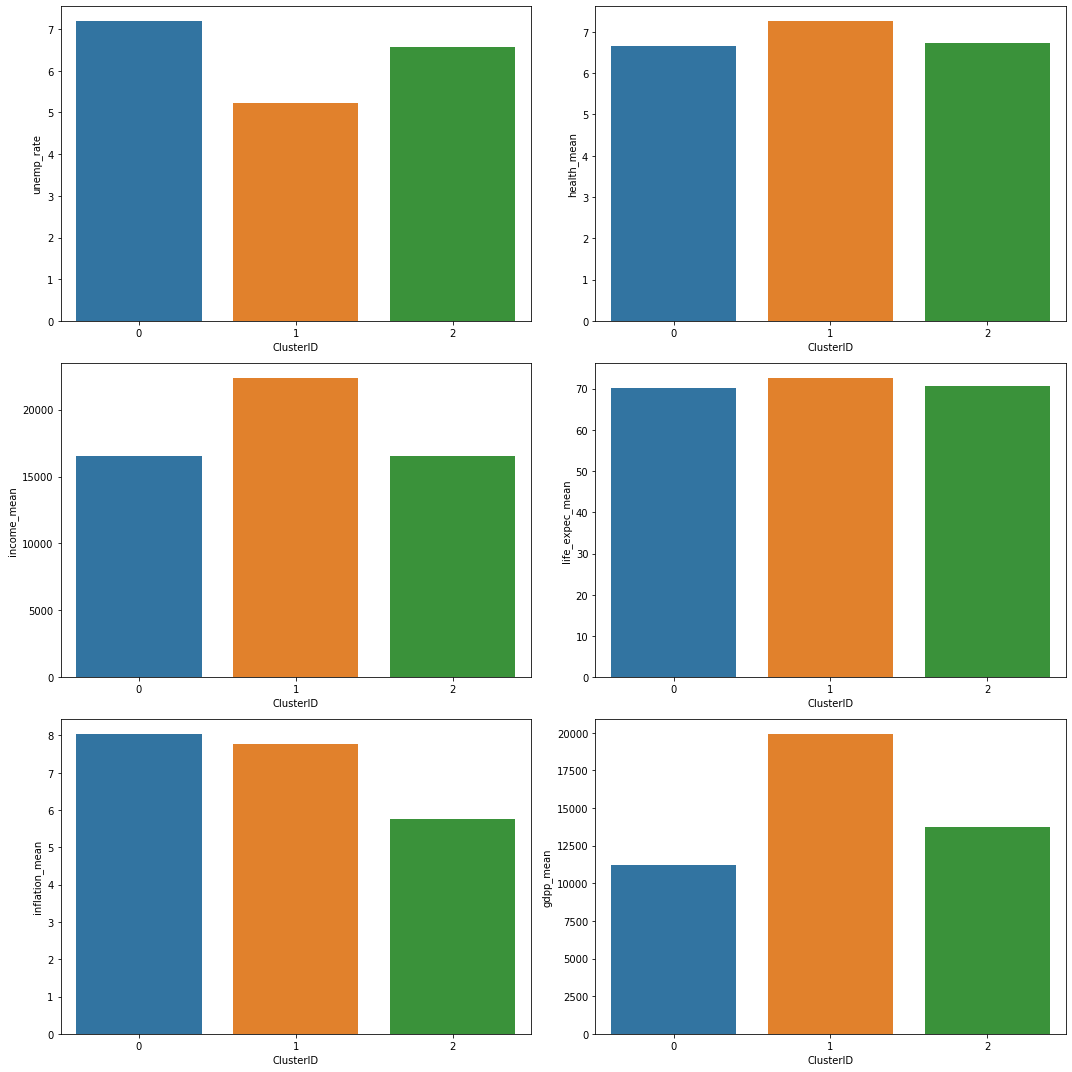

In [61]:
fig, axs = plt.subplots(3,2,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.unemp_rate, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,1])
plt.tight_layout()

In [62]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Azerbaijan',
       'Bangladesh', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Denmark', 'Dominican Republic', 'Egypt', 'Eritrea', 'Estonia',
       'France', 'Gabon', 'Gambia', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'India', 'Indonesia', 'Iraq', 'Jamaica',
       'Jordan', 'Kenya', 'Kuwait', 'Kyrgyz Republic', 'Lao', 'Latvia',
       'Lebanon', 'Lesotho', 'Libya', 'Macedonia, FYR', 'Madagascar',
       'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Moldova',
       'Montenegro', 'Namibia', 'Nigeria', 'Norway', 'Oman', 'Pakistan',
       'Panama', 'Philippines', 'Portugal', 'Qatar', 'Russia', 'Rwanda',


In [63]:
clustered_data_hc[clustered_data_hc.ClusterID == 1].country.values

array(['Angola', 'Austria', 'Bahrain', 'Barbados', 'Comoros',
       'Congo, Dem. Rep.', 'Ecuador', 'El Salvador', 'Equatorial Guinea',
       'Germany', 'Hungary', 'Iceland', 'Israel', 'Japan', 'Lithuania',
       'Luxembourg', 'Maldives', 'Mauritania', 'Mongolia', 'Morocco',
       'Nepal', 'Niger', 'Poland', 'Solomon Islands', 'Sudan',
       'Switzerland', 'Tunisia', 'United Arab Emirates', 'United States',
       'Vanuatu'], dtype=object)

In [64]:
clustered_data_hc[clustered_data_hc.ClusterID == 2].country.values

array(['Armenia', 'Australia', 'Bahamas', 'Belarus', 'Brazil', 'Cameroon',
       'Czech Republic', 'Fiji', 'Finland', 'Georgia', 'Ghana', 'Haiti',
       'Iran', 'Ireland', 'Italy', 'Kazakhstan', 'Liberia', 'Mozambique',
       'Myanmar', 'Netherlands', 'New Zealand', 'Paraguay', 'Peru',
       'Romania', 'Senegal', 'Seychelles', 'Slovenia', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Turkey', 'Turkmenistan',
       'Uganda'], dtype=object)